In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import seaborn as sns

In [2]:
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
    
)

In [3]:
valid_datagen = ImageDataGenerator(rescale=1./255)

In [4]:
training_set = valid_datagen.flow_from_directory(
    r"C:\Users\DELL\Desktop\fyp\dataset\Plant_Disease_Dataset\train",
    target_size=(128, 128),  
    batch_size=32,  
    class_mode='categorical', 
    color_mode='rgb',  
    shuffle=True  
)

Found 70295 images belonging to 38 classes.


In [5]:
validation_set =valid_datagen.flow_from_directory(
    r"C:\Users\DELL\Desktop\fyp\dataset\Plant_Disease_Dataset\valid",
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=True
)

Found 17572 images belonging to 38 classes.


In [6]:
training_set = tf.keras.utils.image_dataset_from_directory(
    r"C:\Users\DELL\Desktop\fyp\dataset\Plant_Disease_Dataset\train",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


In [7]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    r"C:\Users\DELL\Desktop\fyp\dataset\Plant_Disease_Dataset\valid",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [8]:
cnn = tf.keras.models.Sequential()

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [11]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [12]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [13]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [14]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [15]:
cnn.add(tf.keras.layers.Flatten())

In [16]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [17]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [18]:
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

In [19]:
cnn.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [20]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
from tensorflow.keras.callbacks import EarlyStopping


early_stopping = EarlyStopping(
    monitor='val_accuracy',    
    patience=3,                
    restore_best_weights=True  
)
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10, callbacks=[early_stopping])

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2267s 1s/step - accuracy: 0.3864 - loss: 2.1816 - val_accuracy: 0.8037 - val_loss: 0.6123
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2170s 988ms/step - accuracy: 0.8297 - loss: 0.5422 - val_accuracy: 0.8867 - val_loss: 0.3540
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1850s 842ms/step - accuracy: 0.9001 - loss: 0.3095 - val_accuracy: 0.9162 - val_loss: 0.2651
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2064s 940ms/step - accuracy: 0.9321 - loss: 0.2088 - val_accuracy: 0.9245 - val_loss: 0.2419
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2161s 984ms/step - accuracy: 0.9477 - loss: 0.1553 - val_accuracy: 0.9400 - val_loss: 0.1940
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2276s 1s/step - accuracy: 0.9612 - loss: 0.1193 - val_accuracy: 0.9472 - val_loss: 0.1708
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2470s 1s/step - accuracy: 0.9696 - loss: 0.0915 - val_accuracy: 0.9474 - val_loss: 0.1626
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1843s 839ms/step - acc

In [22]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)


2197/2197 ━━━━━━━━━━━━━━━━━━━━ 516s 235ms/step - accuracy: 0.9884 - loss: 0.0360
Training accuracy: 0.9900277256965637


In [23]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 ━━━━━━━━━━━━━━━━━━━━ 116s 210ms/step - accuracy: 0.9647 - loss: 0.1093
Validation accuracy: 0.9658547639846802


In [47]:
cnn.save("idp_new_plant_disease_trained_model.keras")

In [48]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

In [49]:
true_labels = []
predicted_categories = []

# Loop through the validation set and collect true labels and predictions
for images, labels in validation_set:
    # Collect true labels (the actual labels from the dataset)
    true_labels.extend(tf.argmax(labels, axis=1).numpy())
    
    # Predict the categories using the trained model
    predictions = cnn.predict(images)
    
    # Collect the predicted labels
    predicted_categories.extend(tf.argmax(predictions, axis=1).numpy())

# Convert lists to numpy arrays
true_labels = np.array(true_labels)
predicted_categories = np.array(predicted_categories)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

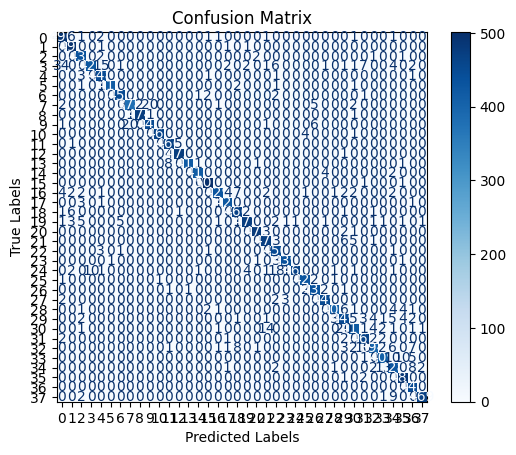

In [52]:

cm = confusion_matrix(true_labels, predicted_categories)

# Display the confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot(cmap=plt.cm.Blues)

# Add labels to the matrix
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


In [53]:
report = classification_report(true_labels, predicted_categories)
print(report)


              precision    recall  f1-score   support

           0       0.91      0.97      0.94       504
           1       0.96      0.99      0.98       497
           2       0.95      0.99      0.97       440
           3       0.98      0.85      0.91       502
           4       0.94      0.99      0.96       454
           5       1.00      0.99      0.99       421
           6       0.98      0.99      0.99       456
           7       0.95      0.92      0.93       410
           8       1.00      0.99      0.99       477
           9       0.96      0.94      0.95       477
          10       1.00      0.99      0.99       465
          11       0.97      0.99      0.98       472
          12       0.99      0.99      0.99       480
          13       1.00      0.97      0.99       430
          14       0.99      0.99      0.99       423
          15       0.99      1.00      0.99       503
          16       0.98      0.93      0.96       459
          17       0.98    

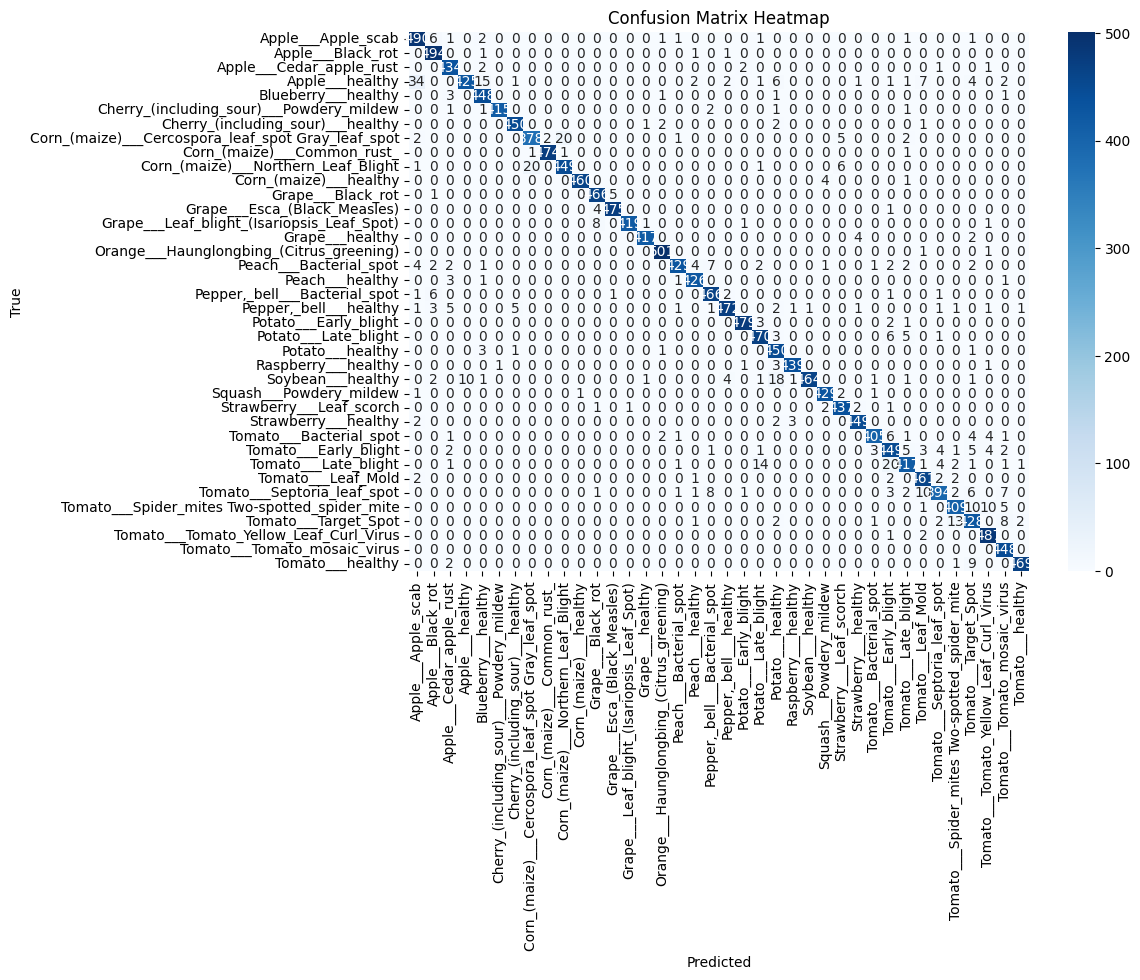

In [55]:
plt.figure(figsize=(10,7))

# Use class_names from validation_set instead of class_indices
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=validation_set.class_names, 
            yticklabels=validation_set.class_names)

plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [31]:
lb = LabelBinarizer()
lb.fit(true_labels)
true_labels_binarized = lb.transform(true_labels)
predicted_binarized = lb.transform(predicted_categories)


In [56]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

true_labels = np.array(true_labels)
predicted_categories = np.array(predicted_categories)


In [57]:
precision = precision_score(true_labels, predicted_categories, average='weighted')
recall = recall_score(true_labels, predicted_categories, average='weighted')
f1 = f1_score(true_labels, predicted_categories, average='weighted')


In [58]:
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


Precision: 0.9664
Recall: 0.9659
F1-Score: 0.9657


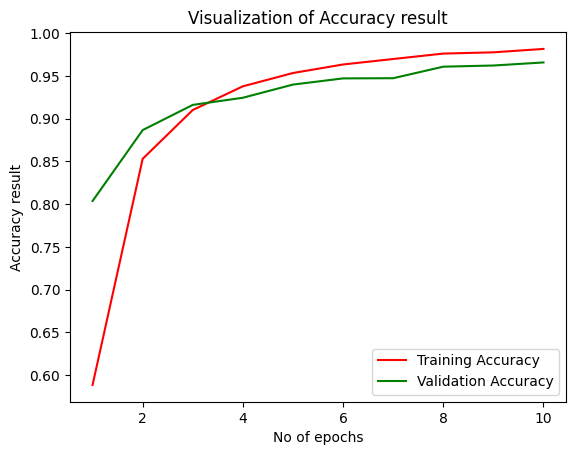

In [59]:
epochs =[i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='green',label='Validation Accuracy')
plt.xlabel("No of epochs")
plt.ylabel("Accuracy result")
plt.title("Visualization of Accuracy result")
plt.legend()
plt.show()

In [65]:
from sklearn.metrics import mean_squared_error

mae = mean_absolute_error(true_labels, predicted_categories)    #mean absolute error
print(f"Mean Absolute Error (MAE): {mae:.4f}")

Mean Absolute Error (MAE): 0.2643


In [67]:
mse = mean_squared_error(true_labels, predicted_categories)  #mean squared error
print(f"Mean Squared Error (MSE): {mse:.4f}")


Mean Squared Error (MSE): 4.3316


In [68]:
rmse = np.sqrt(mse)                                 #root mean squared error
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

Root Mean Squared Error (RMSE): 2.0813
